<a href="https://colab.research.google.com/github/rsalmin/drafts/blob/master/about-one-task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Разберём одну задачу

Пусть у нас есть множество с $M$ элементами и мы выбираем $m$ любых элементов пренадлежащих этому множеству. Сначала определим какова вероятность того, хотя бы два элемента из $m$ буду одинаковы? Для этого посчитаем вероятность того, что все элементы будут разные. 
Способов выбрать $m$ разных элементов 
$$A^m_M = \frac{M!}{(M-m)!}$$
А способов выбрать $m$ элементов $M^m$ по этому наша вероятность будет равна
$$P_{all\_diff} = \frac{M!}{(M-m)!M^m} = \frac{(M-1)!}{(M-m)!M^{(m-1)}} = \prod_{i=1}^{m-1}(1-\frac{i}{M})$$
А искомая
$$
 P_{coin} = 1 - P_{all\_diff} = 1 - \prod_{i=1}^{m-1}(1-\frac{i}{M})
$$


In [0]:
import numpy as np

#expeting m > 1, if m == 1 result is 0
def pMm(M, m):
  return 1 - np.prod( 1 - np.arange(1,m, dtype=np.float64) / M )

Например вероятность того что в класе из 30 человек, хотя бы у двоих совпадут дни рождения будет:

In [11]:
pMm(365,30)

0.7063162427192687

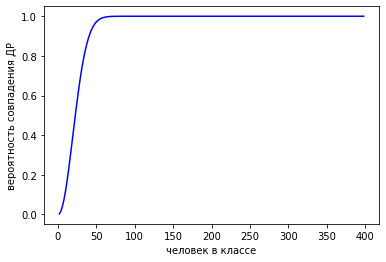

In [12]:
import matplotlib.pyplot as plt

xs = np.arange(2,400,2)
ys = [pMm(365,x) for x in xs]
plt.plot(xs, ys, 'b')
plt.xlabel("человек в классе")
plt.ylabel("вероятность совпадения ДР")
plt.show()

# Но нас интересует обратная задача

Определить мощность множества по наличию совпадения.

Событие $A$ - это событие того, что мощность исходного множества $M$. Событие $B$ - это событие того, что в выбранных (из исходного множетсва) $m$ элементов содержится хотя бы два одинаковых. 
 Т.е. мы прикинули $P(B)$ и хотим оценить $P(A|B)$. При этом  $P(B|A) = P_{coin}$ - мы уже посчитали раньше. Посчитаем $P(A|B)$ по теореме Байеса
$$
 P(A|B) = \frac{P(B|A)P(A)}{P(B)}
$$
 $P(A)$ - константа

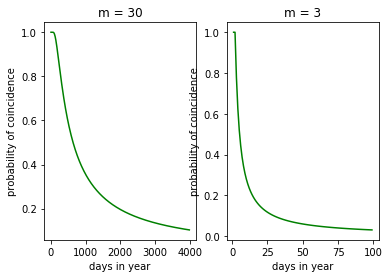

In [13]:
xs1 = np.arange(1,4000,10)
ys1 = [pMm(x, 30) for x in xs1]

xs2 = np.arange(1,100,1)
ys2 = [pMm(x, 3) for x in xs2]

fig, (ax1,ax2) = plt.subplots(1,2)

ax1.plot(xs1, ys1, "g")
ax1.set_title("m = 30")
ax1.set_xlabel("days in year")
ax1.set_ylabel("probability of coincidence")

ax2.plot(xs2, ys2, "g")
ax2.set_title("m = 3")
ax2.set_xlabel("days in year")
ax2.set_ylabel("probability of coincidence")
plt.show()